In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Matplotlib

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv('./drive/My Drive/Kaggle/Titanic/train.csv')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
total_survived = len(df_train[df_train['Survived']==1])
total_death = len(df_train[df_train['Survived']==0])

In [0]:
total_survived, total_death

(342, 549)

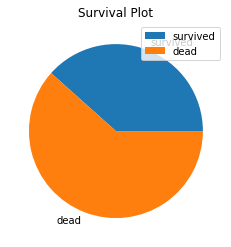

In [0]:
plt.pie([total_survived, total_death], labels=['survived', 'dead'])
plt.legend()
plt.title('Survival Plot')
plt.show()

From the pie chart we can infer that majority of the boarders didn't survive the accident.

In [0]:
df_train['Pclass'].unique()

array([3, 1, 2])

In [0]:
count_1 = count_2 = count_3 = 0

for i in df_train['Pclass']:
    if i == 1:
        count_1 += 1
    elif i == 2:
        count_2 += 1
    elif i == 3:
        count_3 += 1

count_1_live = count_2_live = count_3_live = 0

for survive_status, group in df_train.groupby('Survived'):
    if(survive_status == 1):
        for i in group['Pclass']:
            if i == 1:
                count_1_live += 1
            elif i == 2:
                count_2_live += 1
            elif i == 3:
                count_3_live += 1

count_1, count_2, count_3, count_1_live, count_2_live, count_3_live

(216, 184, 491, 136, 87, 119)

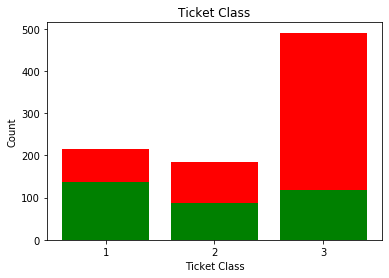

In [0]:
plt.bar(x=[str(1), str(2), str(3)], height=[count_1, count_2, count_3], color='red')
plt.bar(x=[str(1), str(2), str(3)], height=[count_1_live, count_2_live, count_3_live], color='green')
plt.title('Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

There seems to be a very high death ratio of people 3rd ticket class. 1st class tickets have the highest survival rate. 2nd class tickets have a 50% survival rate.

In [0]:
male_count = female_count = 0

for i in df_train['Sex']:
    if i == 'male':
        male_count += 1
    elif i == 'female':
        female_count += 1

male_count_live = female_count_live= 0

for survive_status, group in df_train.groupby('Survived'):
    if(survive_status == 1):
        for i in group['Sex']:
            if i == 'male':
                male_count_live += 1
            elif i == 'female':
                female_count_live += 1

male_count, female_count, male_count_live, female_count_live

(577, 314, 109, 233)

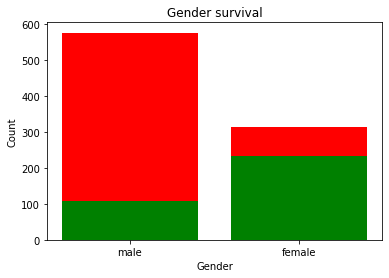

In [0]:
plt.bar(x=['male', 'female'], height=[male_count, female_count], color='red')
plt.bar(x=['male', 'female'], height=[male_count_live, female_count_live], color='green')
plt.title('Gender survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Female boarders have a extremely high survival rate though there were less number of female boarders in total.

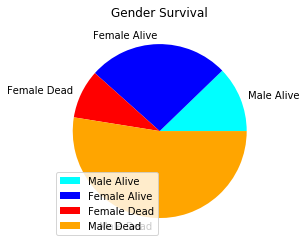

In [0]:
plt.pie([male_count_live, female_count_live, female_count-female_count_live, male_count-male_count_live], labels=['Male Alive', 'Female Alive', 'Female Dead', 'Male Dead'], colors=['cyan', 'blue', 'red', 'orange'])
plt.title('Gender Survival')
plt.legend()
plt.show()

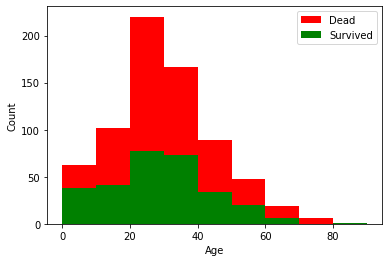

In [0]:
plt.hist(df_train['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color='red', label='Dead')

Survived_age = []

for name, group in df_train.groupby('Survived'):
    if name == 1:
        Survived_age = group['Age']

plt.hist(Survived_age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color='green', label='Survived')

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [0]:
max(df_train['Fare'])

512.3292

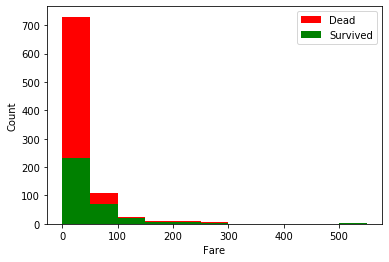

In [0]:
plt.hist(df_train['Fare'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550], color='red', label='Dead')

Survived_fare = []

for name, group in df_train.groupby('Survived'):
    if name == 1:
        Survived_fare = group['Fare']

plt.hist(Survived_fare, [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550], color='green', label='Survived')

plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

Nearly everbody who paid high fare for ticket survived. This relation has already been observed in class of ticket.